In [23]:
import pandas as pd
import pickle
from xgboost import XGBRegressor
import numpy as np

In [24]:
train = pd.read_csv('final_featured_dataset.csv')
train.shape

(188340, 26)

In [25]:
#  Separate X and y
X = train.drop(['Sales', 'Sales_log', '#Order', 'Order_log', 'Sales_per_Order', 'ID', 'Date'], axis=1)
y = (train['Sales'])

In [26]:
#  Train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# Predict on training data
y_train_pred_scaled = model.predict(X)

In [28]:
# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

C:\Users\konam\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
# Inverse transform the Sales column
# scaler expects 2D array, so we need to reshape
y_train_pred = scaler.inverse_transform(
    np.column_stack((y_train_pred_scaled, np.zeros((len(y_train_pred_scaled), 3))))
)[:, 0]  # Take only the first column (Sales)

# Also inverse transform actual y
y_train_actual = scaler.inverse_transform(
    np.column_stack((y, np.zeros((len(y), 3))))
)[:, 0]


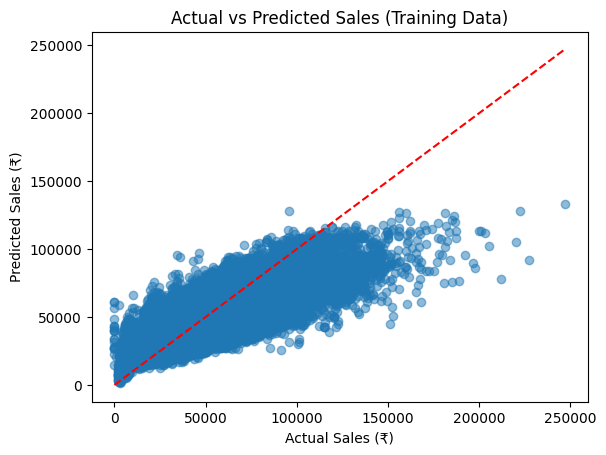

In [30]:
# Plot Actual vs Predicted (in original Sales scale)
import matplotlib.pyplot as plt

plt.scatter(y_train_actual, y_train_pred, alpha=0.5)
plt.plot([y_train_actual.min(), y_train_actual.max()],
         [y_train_actual.min(), y_train_actual.max()],
         'r--')
plt.xlabel('Actual Sales (₹)')
plt.ylabel('Predicted Sales (₹)')
plt.title('Actual vs Predicted Sales (Training Data)')
plt.show()

In [31]:
# Save the trained model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model trained and saved successfully!")

Model trained and saved successfully!
